In [1]:
import os
import glob
import numpy as np
import pandas as pd
import nibabel as nib

import matplotlib.pyplot as plt

In [2]:
FEATURES_PATH = "data/ds001246/derivatives/preproc-spm/output"
TARGETS_PATH = "data/ds001246"
TRAIN_CATEGORIES_PATH = "data/ds001246/stimulus_ImageNetTraining.csv"
TEST_CATEGORIES_PATH = "data/ds001246/stimulus_ImageNetTest.csv"
PROCESSED_PATH = "data/10classes"

In [3]:
categories = pd.read_csv(TRAIN_CATEGORIES_PATH, sep="\t", header=None)

In [4]:
# restric
# category_labels = {
#     "ostrich": "n01518878",
#     "hummingbird": "n01833805",
#     "battleplane": "n02692877",
#     "backpack": "n02769748",
#     "frog": "n01639765",
#     "watermelon": "n07756951",
#     "hot air balloon": "n03541923",
#     "light bulb": "n03665924",
#     "coffee cup": "n03063599",
#     "horse": "n02374451",
# }

category_numbers = {
    "1": "n01518878",
    "3": "n01833805",
    "7": "n02692877",
    "4": "n02769748",
    "2": "n01639765",
    "10": "n07756951",
    "8": "n03541923",
    "9": "n03665924",
    "6": "n03063599",
    "5": "n02374451",
    "-1": "n00000000",
}

category_map = {v: int(k) for k, v in category_numbers.items()}

In [12]:
def convert(subject="01", session_id="01", task="perception", train=True):
    session = f"{task}{'Training' if train else 'Test'}{session_id}"

    # load data
    feature_runs = sorted(glob.glob(f"{FEATURES_PATH}/sub-{subject}/ses-{session}/func/*"))
    target_runs = sorted(glob.glob(f"{TARGETS_PATH}/sub-{subject}/ses-{session}/func/*events*"))
    categories = pd.read_csv(TRAIN_CATEGORIES_PATH if train else TEST_CATEGORIES_PATH, sep="\t", header=None)
    categories["label"] = [
        category_map[lab.split("_")[0]] if lab.split("_")[0] in category_map else -1
        for lab in categories[0]
    ]

    # process features and targets
    features = []
    targets = []

    for f_run, t_run in zip(feature_runs, target_runs):
        features_run = nib.load(f_run).get_fdata()
        targets_run = pd.read_csv(t_run, sep="\t")

        # remove resting states
        features_run_pp = features_run[:, :, :, 8:-2]
        targets_run_pp = targets_run[targets_run["event_type"] != "rest"]

        # reshape features into (N, C, D, W, H)
        features_run_pp = features_run_pp.transpose(3, 2, 1, 0).reshape(-1, 3, 50, 64, 64)

        # extract category labels
        targets_run_pp = targets_run_pp.merge(categories, left_on="stim_id", right_on=1)["label"]
        targets_run_pp = targets_run_pp.to_numpy().reshape(-1, 1)

        # restriction mask
        restricted_classes = (targets_run_pp > -1).flatten()
        features_run_pp = features_run_pp[restricted_classes, :, :, :, :]
        targets_run_pp = targets_run_pp[restricted_classes]

        features.append(features_run_pp)
        targets.append(targets_run_pp)

    features = np.vstack(features)
    targets = np.vstack(targets)

    # convert and store as tensors
    # features = torch.from_numpy(features).float()
    # targets = torch.from_numpy(targets).long() - 1

    # flatten targets
    targets = targets.squeeze()

    # save to disk
    os.makedirs(f"{PROCESSED_PATH}/sub-{subject}/ses-{session}/fmris", exist_ok=True)
    os.makedirs(f"{PROCESSED_PATH}/sub-{subject}/ses-{session}/categories", exist_ok=True)

    for i, (f, t) in enumerate(zip(features, targets)):
        np.save(f"{PROCESSED_PATH}/sub-{subject}/ses-{session}/fmris/{i}.npy", f)
        np.save(f"{PROCESSED_PATH}/sub-{subject}/ses-{session}/categories/{i}.npy", t)

In [19]:
t1 = convert(subject="01", session_id="01", task="perception", train=True)
np.unique(t1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
t2 = convert(subject="01", session_id="02", task="perception", train=True)
np.unique(t2)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
t3 = convert(subject="01", session_id="03", task="perception", train=True)
np.unique(t3)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

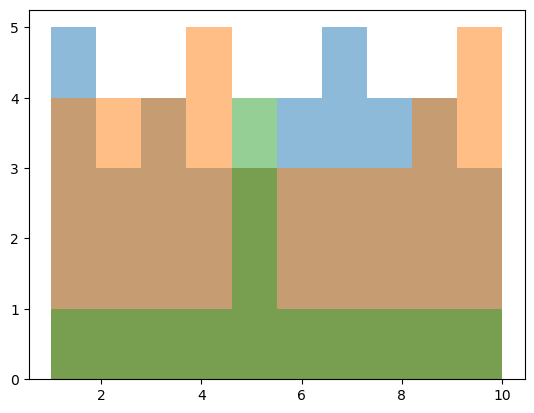

In [27]:
plt.hist(t1, bins=10, alpha=0.5)
plt.hist(t2, bins=10, alpha=0.5)
plt.hist(t3, bins=10, alpha=0.5)
plt.show()

In [ ]:
a =

In [11]:
convert(subject="01", session_id="01", task="perception", train=True)
convert(subject="01", session_id="02", task="perception", train=True)
convert(subject="01", session_id="03", task="perception", train=True)

In [7]:
convert(subject="02", session_id="01", task="perception", train=True)
convert(subject="02", session_id="02", task="perception", train=True)
convert(subject="02", session_id="03", task="perception", train=True)

In [8]:
convert(subject="03", session_id="01", task="perception", train=True)
convert(subject="03", session_id="02", task="perception", train=True)
convert(subject="03", session_id="03", task="perception", train=True)

In [9]:
convert(subject="04", session_id="01", task="perception", train=True)
convert(subject="04", session_id="02", task="perception", train=True)
convert(subject="04", session_id="03", task="perception", train=True)

In [10]:
convert(subject="05", session_id="01", task="perception", train=True)
convert(subject="05", session_id="02", task="perception", train=True)
convert(subject="05", session_id="03", task="perception", train=True)